In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [102]:
df=pd.read_csv(r"C:\Users\sanket patil\Downloads\stroke-data.csv")

In [104]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# EDA

In [107]:
df=df.drop("id",axis=1)

In [109]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [111]:
df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [113]:
df.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [115]:
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [117]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [119]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

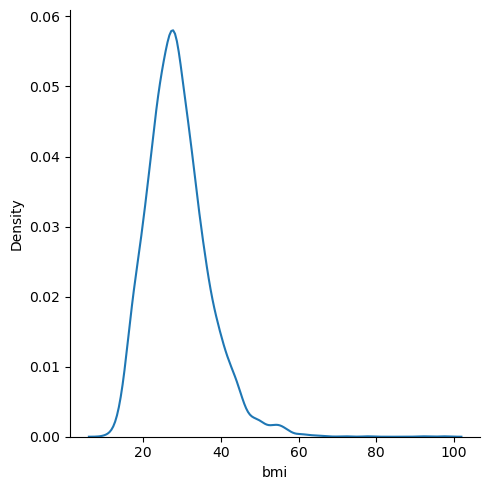

In [121]:
sns.displot(df["bmi"],kind="kde")

In [124]:
df.groupby("gender")["stroke"].count()

gender
Female    2994
Male      2115
Other        1
Name: stroke, dtype: int64

# Missing value filling

In [127]:
median=df['bmi'].median()

In [129]:
def input_nan (df,varible,median):
    df[varible+"_median"]=df[varible].fillna(median)
    df[varible+"_random"]=df[varible]
    random_sample=df["bmi"].dropna().sample(df["bmi"].isna().sum(),random_state=0)
    random_sample.index=df[df[varible].isna()].index
    df.loc[df[varible].isna(),varible+"_random"]=random_sample
   



In [131]:
input_nan(df,"bmi",median)

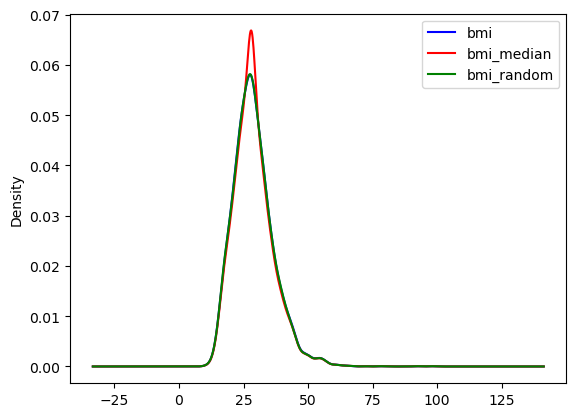

In [133]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['bmi'].plot(kind='kde', ax=ax,color="blue")
df.bmi_median.plot(kind='kde', ax=ax, color='red')
df.bmi_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Outelier detection and tretment

<Axes: ylabel='age'>

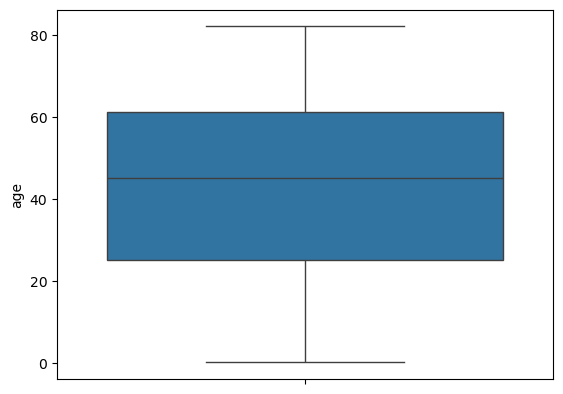

In [136]:
sns.boxplot(df["age"])

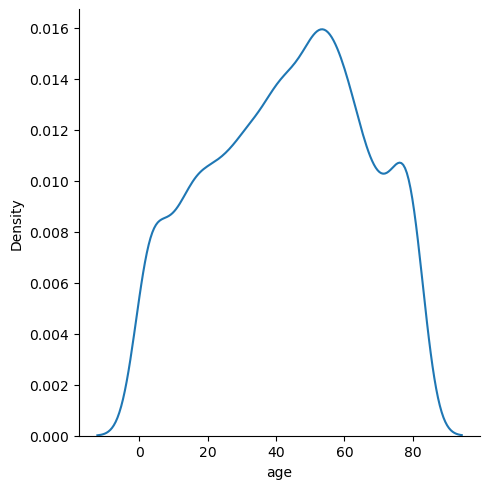

In [138]:
sns.displot(df["age"],kind="kde")

<Axes: ylabel='avg_glucose_level'>

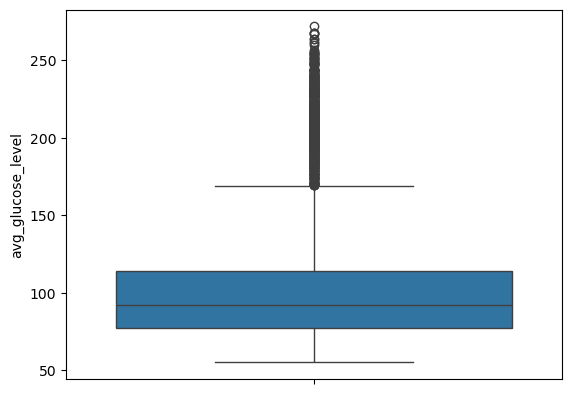

In [140]:
sns.boxplot(df['avg_glucose_level'])

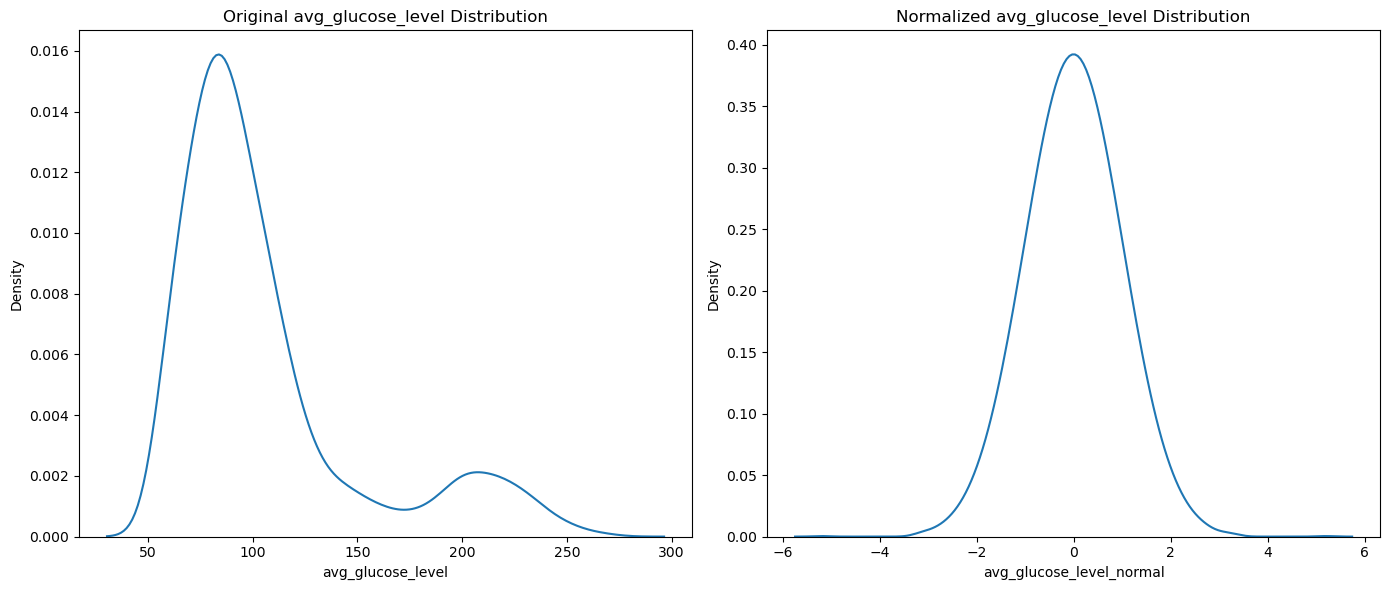

In [142]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

# Assuming df is your DataFrame and contains the column 'avg_glucose_level'

# Quantile transformation on 'avg_glucose_level'
qt = QuantileTransformer(output_distribution='normal')
df['avg_glucose_level_normal'] = qt.fit_transform(df[['avg_glucose_level']])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original distribution with KDE
sns.kdeplot(df["avg_glucose_level"], ax=axes[0])
axes[0].set_title("Original avg_glucose_level Distribution")

# Transformed distribution
sns.kdeplot(df["avg_glucose_level_normal"], ax=axes[1])
axes[1].set_title("Normalized avg_glucose_level Distribution")

# Display the plots
plt.tight_layout()
plt.show()


<Axes: ylabel='bmi'>

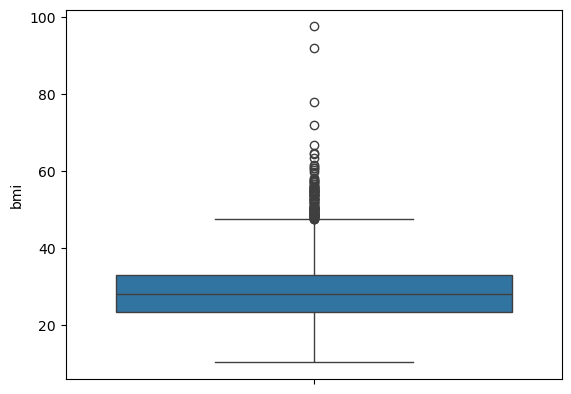

In [144]:
sns.boxplot(df['bmi'])

In [146]:
from scipy.stats.mstats import winsorize
df['bmi_winsorized'] = winsorize(df['bmi_random'], limits=[0.05, 0.05])


<Axes: ylabel='bmi_winsorized'>

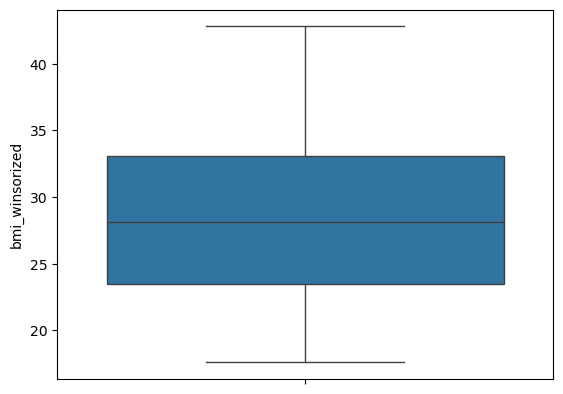

In [148]:
sns.boxplot(df['bmi_winsorized'])

C:\Users\sanket patil\AppData\Local\Temp\ipykernel_10884\1228038990.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='stroke', palette='viridis')


<Axes: xlabel='stroke', ylabel='count'>

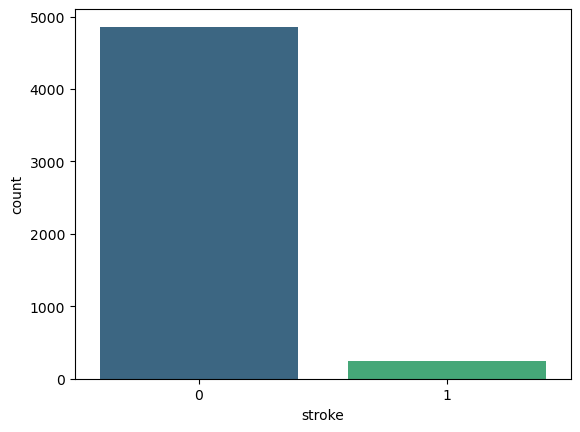

In [150]:
sns.countplot(data=df, x='stroke', palette='viridis')

## Onehot encoding

In [153]:
# Create dummy variables for 'gender', 'work_type', and 'smoking_status' with drop_first=True
df = pd.get_dummies(df, columns=['gender', 'work_type', 'smoking_status'], drop_first=True)

# Convert all dummy columns to integer format
df = df.astype({col: 'int' for col in df.columns if col.startswith(('gender_', 'work_type_', 'smoking_status_'))})




In [155]:
# Create dummy variables for 'gender', 'work_type', and 'smoking_status' with drop_first=True
df = pd.get_dummies(df, columns=['ever_married','Residence_type'], drop_first=True)

# Convert all dummy columns to integer format
df = df.astype({col: 'int' for col in df.columns if col.startswith(('ever_married','Residence_type'))})


In [157]:
df.drop(["avg_glucose_level","bmi","bmi_median","avg_glucose_level_normal","bmi_random"],axis=1,inplace=True)

In [159]:
df

,age,hypertension,heart_disease,stroke,bmi_winsorized,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_Yes,Residence_type_Urban
0,67.0,0,1,1,36.6,1,0,0,1,0,0,1,0,0,1,1
1,61.0,0,0,1,27.3,0,0,0,0,1,0,0,1,0,1,0
2,80.0,0,1,1,32.5,1,0,0,1,0,0,0,1,0,1,0
3,49.0,0,0,1,34.4,0,0,0,1,0,0,0,0,1,1,1
4,79.0,1,0,1,24.0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,0,31.3,0,0,0,1,0,0,0,1,0,1,1
5106,81.0,0,0,0,40.0,0,0,0,0,1,0,0,1,0,1,1
5107,35.0,0,0,0,30.6,0,0,0,0,1,0,0,1,0,1,0
5108,51.0,0,0,0,25.6,1,0,0,1,0,0,1,0,0,1,0


# Modelfitting

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [143]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## RandomForest

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.combine import SMOTETomek
from sklearn.metrics import recall_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)

# Apply SMOTETomek to the training data
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Define the parameter grid for Random Forest
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced', None]  # Optionally adjust class weights
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,  # Number of different combinations to try
    scoring='recall',  # Focus on maximizing recall
    cv=3,  # 3-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_resampled, y_resampled)

# Best hyperparameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)



print("Recall on Test Set:", recall)


C:\Users\sanket patil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
111 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sanket patil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sanket patil\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\sanket patil\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sank

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'class_weight': 'balanced'}
Recall on Test Set: 0.95625


In [197]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9080234833659491
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.19      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.57      0.56      0.56      1022
weighted avg       0.90      0.91      0.90      1022

Confusion Matrix:
 [[918  42]
 [ 52  10]]


## Balanced Random forest

In [96]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.combine import SMOTETomek
from sklearn.metrics import recall_score
X = df.drop(columns=['stroke'])  # Drop 'stroke' column to get feature set
y = df['stroke'] 
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define the parameter grid for Balanced Random Forest
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Balanced Random Forest classifier
brf = BalancedRandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=brf,
    param_distributions=param_distributions,
    n_iter=100,  # Number of different combinations to try
    scoring='recall',  # Focus on maximizing recall
    cv=3,  # 3-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_train, y_train)

# Best hyperparameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test set
best_brf = random_search.best_estimator_
y_pred = best_brf.predict(X_test)

# Calculate recall on the test set
recall = recall_score(y_test, y_pred)
print("Recall on Test Set:", recall)


C:\Users\sanket patil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
79 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sanket patil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sanket patil\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\sanket patil\anaconda3\Lib\site-packages\imblearn\base.py", line 42, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\sank

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Recall on Test Set: 0.9193548387096774


In [98]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6898238747553816
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.68      0.80       960
           1       0.15      0.92      0.26        62

    accuracy                           0.69      1022
   macro avg       0.57      0.80      0.53      1022
weighted avg       0.94      0.69      0.77      1022

Confusion Matrix:
 [[648 312]
 [  5  57]]


## LogisticRegression

In [96]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

# Assuming df is your DataFrame and 'stroke' is the target variable
X = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize Logistic Regression with class weight
lr = LogisticRegression(random_state=42, max_iter=1000,C=0.15,class_weight={0:1,1:5})

# Fit the model on the resampled data
lr.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_proba = lr.predict_proba(X_test)[:, 1]

# Adjust threshold to improve recall
threshold = 0.57  # Example threshold, adjust as necessary
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming 1 is the positive class
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Recall on Test Set:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6868884540117417
Recall on Test Set: 0.7258064516129032
Confusion Matrix:
 [[657 303]
 [ 17  45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.68      0.80       960
           1       0.13      0.73      0.22        62

    accuracy                           0.69      1022
   macro avg       0.55      0.71      0.51      1022
weighted avg       0.92      0.69      0.77      1022



## Threshold Deside

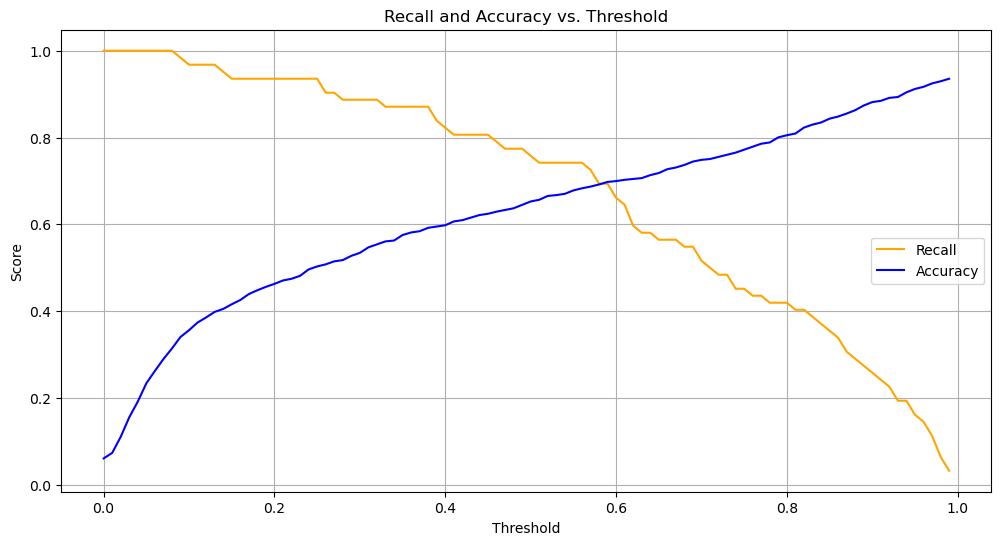

Intersections where Recall and Accuracy meet the thresholds:
Threshold: 0.50, Recall: 0.76, Accuracy: 0.65
Threshold: 0.51, Recall: 0.74, Accuracy: 0.66
Threshold: 0.52, Recall: 0.74, Accuracy: 0.67
Threshold: 0.53, Recall: 0.74, Accuracy: 0.67
Threshold: 0.54, Recall: 0.74, Accuracy: 0.67
Threshold: 0.55, Recall: 0.74, Accuracy: 0.68
Threshold: 0.56, Recall: 0.74, Accuracy: 0.68
Threshold: 0.57, Recall: 0.73, Accuracy: 0.69
Threshold: 0.58, Recall: 0.69, Accuracy: 0.69
Threshold: 0.59, Recall: 0.69, Accuracy: 0.70
Threshold: 0.60, Recall: 0.66, Accuracy: 0.70
Threshold: 0.61, Recall: 0.65, Accuracy: 0.70


In [387]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score

# Create an array of thresholds from 0.0 to 1.0
thresholds = np.arange(0.0, 1.0, 0.01)
recalls = []
accuracies = []

# Loop through thresholds and calculate metrics
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)

# Convert to numpy arrays for easy indexing
recalls = np.array(recalls)
accuracies = np.array(accuracies)

# Plot Recall and Accuracy against the Threshold
plt.figure(figsize=(12, 6))
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.plot(thresholds, accuracies, label='Accuracy', color='blue')
plt.title('Recall and Accuracy vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

# Find intersections of Recall and Accuracy above a specific threshold
min_recall_threshold = 0.6  # Set your minimum recall threshold
min_accuracy_threshold = 0.65  # Set your minimum accuracy threshold

# Identify the indices where both conditions are met
intersection_indices = np.where((recalls >= min_recall_threshold) & (accuracies >= min_accuracy_threshold))[0]

# Print the results
if intersection_indices.size > 0:
    print("Intersections where Recall and Accuracy meet the thresholds:")
    for idx in intersection_indices:
        print(f"Threshold: {thresholds[idx]:.2f}, Recall: {recalls[idx]:.2f}, Accuracy: {accuracies[idx]:.2f}")
else:
    print("No intersections found where both Recall and Accuracy meet the specified thresholds.")


## Naive Bayes

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

# Assuming df is your DataFrame and 'stroke' is the target variable
X = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize Naive Bayes Classifier
nb = GaussianNB()

# Fit the model on the resampled data
nb.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming 1 is the positive class
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Recall on Test Set:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.33659491193737767
Recall on Test Set: 0.967741935483871
Confusion Matrix:
 [[284 676]
 [  2  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.30      0.46       960
           1       0.08      0.97      0.15        62

    accuracy                           0.34      1022
   macro avg       0.54      0.63      0.30      1022
weighted avg       0.94      0.34      0.44      1022



## Decision Tree

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
import numpy as np

# Assuming df is your DataFrame and 'stroke' is the target variable
X = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'max_depth': [None] + list(range(5, 20)),  # Depth of the tree
    'min_samples_split': np.arange(2, 21),     # Min samples to split an internal node
    'min_samples_leaf': np.arange(1, 21),      # Min samples at a leaf node
    'criterion': ['gini', 'entropy']           # Criterion for splitting
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_grid,
                                   n_iter=50, scoring='recall', cv=5, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV on the resampled data
random_search.fit(X_resampled, y_resampled)

# Best parameters and model evaluation
best_dt = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Make predictions on the test set using the best model
y_pred = best_dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming 1 is the positive class
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Recall on Test Set:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 8, 'criterion': 'gini'}
Accuracy: 0.8551859099804305
Recall on Test Set: 0.43548387096774194
Confusion Matrix:
 [[847 113]
 [ 35  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       960
           1       0.19      0.44      0.27        62

    accuracy                           0.86      1022
   macro avg       0.58      0.66      0.59      1022
weighted avg       0.91      0.86      0.88      1022

